# LSTMモデルを用いたビットコイン・イーサの価格予想
0500 29 5564 酒井勇輔

## 参考文献

・[【入門編】機械学習で仮想通貨の価格予測！KerasでLSTMモデルを構築してビットコインとイーサリアムの翌日の価格を予測する方法](https://www.codexa.net/keras-lstm-cryptos-forecast/)

・[RNNとLSTMを理解する](http://sagantaf.hatenablog.com/entry/2019/06/04/225239)

コードは8割方丸パクリですが、上記出典は間違いor古い情報が多いので気をつけてください。

In [1]:
import pandas as pd
import time
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import numpy as np

## ビットコインとイーサ価格をスクレイピング

In [2]:
# コインマーケットキャップからデータをスクレイピング
bitcoin_market_info = pd.read_html("https://coinmarketcap.com/currencies/bitcoin/historical-data/?start=20130101&end=20200131")[2]
# 取引高が'-'の欠損データを0へ変換
bitcoin_market_info.loc[bitcoin_market_info['Volume']=="-"]=0
# Dateを文字列から日付フォーマットへ変換
bitcoin_market_info = bitcoin_market_info.assign(Date=pd.to_datetime(bitcoin_market_info['Date']))
# イントへ変換
bitcoin_market_info['Volume'] = bitcoin_market_info['Volume'].astype('int64')
# データセットのヘッド情報の確認
bitcoin_market_info.head()
 

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2020-02-01,9346.36,9439.32,9313.24,9392.88,25922656496,170900662180
1,2020-01-31,9508.31,9521.71,9230.78,9350.53,29432489719,170112778161
2,2020-01-30,9316.02,9553.13,9230.90,9508.99,32378792851,172978577931
3,2020-01-29,9357.47,9406.43,9269.47,9316.63,30682598115,169460984603
4,2020-01-28,8912.52,9358.59,8908.45,9358.59,34398744403,170205617955


In [3]:
eth_market_info=pd.read_html("https://coinmarketcap.com/currencies/ethereum/historical-data/?start=20130101&end=20200131")[2]
# データの処理とヘッド情報の表示
eth_market_info.loc[eth_market_info["Volume"]=="-"]=0
eth_market_info = eth_market_info.assign(Date=pd.to_datetime(eth_market_info['Date']))
eth_market_info["Volume"] = bitcoin_market_info["Volume"].astype("int64")
eth_market_info.head()

,Date,Open*,High,Low,Close**,Volume,Market Cap
0,2020-02-01,180.11,183.85,179.75,183.67,25922656496,20116913728
1,2020-01-31,184.74,185.41,176.30,180.16,29432489719,19729633078
2,2020-01-30,174.92,186.26,172.37,184.69,32378792851,20223232964
3,2020-01-29,176.35,178.84,175.05,175.05,30682598115,19165292202
4,2020-01-28,170.88,176.37,170.74,176.37,34398744403,19307396128


In [4]:
# ビットコインとイーサリアムのデータフレームのカラム名を変更
bitcoin_market_info.columns =[bitcoin_market_info.columns[0]]+['bt_'+i for i in bitcoin_market_info.columns[1:]]
eth_market_info.columns =[eth_market_info.columns[0]]+['eth_'+i for i in eth_market_info.columns[1:]]

## 価格推移のグラフ描画(ここでバグる時はKernelをRestartしてください)

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


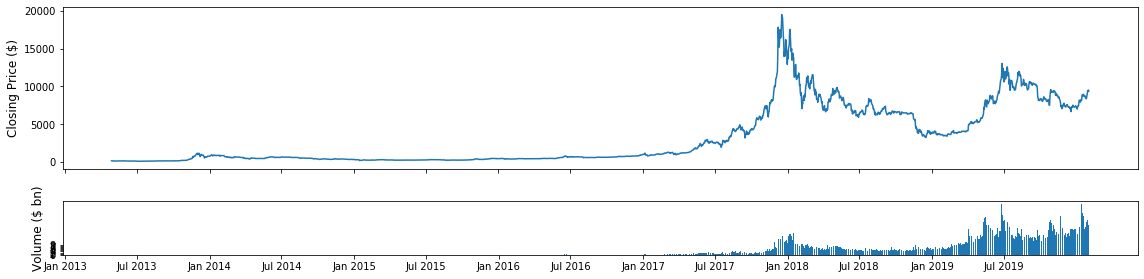

In [5]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]},figsize=(16,4))
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2020) for j in [1,7]])
ax1.plot(bitcoin_market_info['Date'],bitcoin_market_info['bt_Open*'])
ax2.bar(bitcoin_market_info['Date'].values, bitcoin_market_info['bt_Volume'].values)
fig.tight_layout()
plt.show()

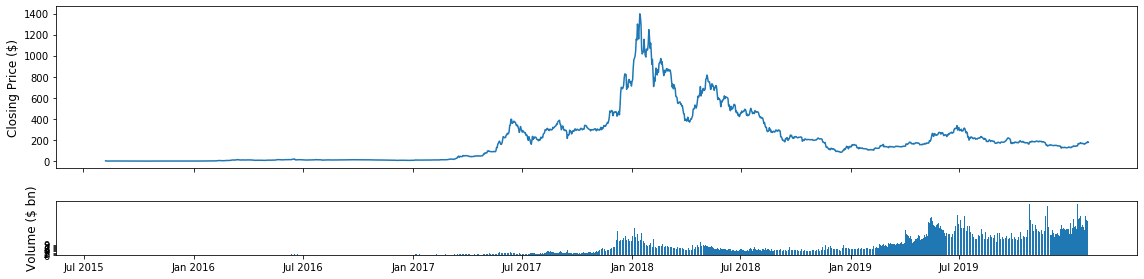

In [6]:
fig, (ax1, ax2) = plt.subplots(2,1, gridspec_kw = {'height_ratios':[3, 1]},figsize=(16,4))
#ax1.set_yscale('log')
ax1.set_ylabel('Closing Price ($)',fontsize=12)
ax2.set_ylabel('Volume ($ bn)',fontsize=12)
ax2.set_yticks([int('%d000000000'%i) for i in range(10)])
ax2.set_yticklabels(range(10))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax1.set_xticklabels('')
ax2.set_xticks([datetime.date(i,j,1) for i in range(2013,2020) for j in [1,7]])
ax2.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2020) for j in [1,7]])
ax1.plot(eth_market_info['Date'],eth_market_info['eth_Open*'])
ax2.bar(eth_market_info['Date'].values, eth_market_info['eth_Volume'].values)
fig.tight_layout()
plt.show()

In [7]:
market_info = pd.merge(bitcoin_market_info,eth_market_info, on="Date")

for coins in ['bt_', 'eth_']: 
    kwargs = { coins+'close_off_high': lambda x: 2*(x[coins+'High']- x[coins+'Close**'])/(x[coins+'High']-x[coins+'Low'])-1,
            coins+'volatility': lambda x: (x[coins+'High']- x[coins+'Low'])/(x[coins+'Open*'])}
    market_info = market_info.assign(**kwargs)
 
 

In [8]:
model_data = market_info[['Date']+[coin+metric for coin in ['bt_', 'eth_'] 
                                   for metric in ['Close**','Volume','close_off_high','volatility']]]
# need to reverse the data frame so that subsequent rows represent later timepoints
model_data = model_data.sort_values(by='Date')
model_data.head()

,Date,bt_Close**,bt_Volume,bt_close_off_high,bt_volatility,eth_Close**,eth_Volume,eth_close_off_high,eth_volatility
1639,2015-08-07,279.58,42484800,-0.597015,0.014422,2.770000,42484800,0.509804,0.360424
1638,2015-08-08,261.00,58533000,0.969823,0.068707,0.753325,58533000,0.962979,0.747410
1637,2015-08-09,265.08,23789600,-0.411945,0.025008,0.701897,23789600,0.419789,0.354916
1636,2015-08-10,264.47,20979400,0.155756,0.016687,0.708448,20979400,-0.541175,0.130685
1635,2015-08-11,270.39,25433900,-1.000000,0.023833,1.070000,25433900,-0.742911,0.659192


## 2019-01-01以前が教師データ、以降がテストデータ

In [9]:
split_date="2019-01-01"

# dateのカラムを削除
training_set, test_set = model_data[model_data['Date']<split_date], model_data[model_data['Date']>=split_date]
training_set = training_set.drop('Date', 1)
test_set = test_set.drop('Date', 1)

In [10]:
# 「窓」を10日に設定してあげます
# 終値と取引量を正規化
window_len = 10
norm_cols = [coin+metric for coin in ['bt_', 'eth_'] for metric in ['Close**','Volume']]
 

In [11]:
# トレーニングとテストのデータセットを「窓」で分ける
LSTM_training_inputs = []
for i in range(len(training_set)-window_len):
    temp_set = training_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_training_inputs.append(temp_set)
LSTM_training_outputs = (training_set['eth_Close**'][window_len:].values/training_set['eth_Close**'][:-window_len].values)-1
 
LSTM_test_inputs = []
for i in range(len(test_set)-window_len):
    temp_set = test_set[i:(i+window_len)].copy()
    for col in norm_cols:
        temp_set.loc[:, col] = temp_set[col]/temp_set[col].iloc[0] - 1
    LSTM_test_inputs.append(temp_set)
LSTM_test_outputs = (test_set['eth_Close**'][window_len:].values/test_set['eth_Close**'][:-window_len].values)-1
 
#最後にトレーニングのインプットデータを確認してみましょう
LSTM_training_inputs[0]

,bt_Close**,bt_Volume,bt_close_off_high,bt_volatility,eth_Close**,eth_Volume,eth_close_off_high,eth_volatility
1639,0.000000,0.000000,-0.597015,0.014422,0.000000,0.000000,0.509804,0.360424
1638,-0.066457,0.377740,0.969823,0.068707,-0.728042,0.377740,0.962979,0.747410
1637,-0.051864,-0.440044,-0.411945,0.025008,-0.746608,-0.440044,0.419789,0.354916
1636,-0.054045,-0.506190,0.155756,0.016687,-0.744243,-0.506190,-0.541175,0.130685
1635,-0.032871,-0.401341,-1.000000,0.023833,-0.613718,-0.401341,-0.742911,0.659192
1634,-0.047214,-0.368824,0.650000,0.019217,-0.559567,-0.368824,-0.655505,0.383389
1633,-0.055440,-0.348343,0.268437,0.012736,-0.339350,-0.348343,-0.650000,0.655738
1632,-0.049717,-0.362332,-0.402337,0.022678,-0.339350,-0.362332,0.686275,0.281768
1631,-0.064490,-0.545223,0.906890,0.020224,-0.389892,-0.545223,0.225806,0.172222
1630,-0.075363,-0.300526,0.455556,0.020621,-0.433213,-0.300526,-0.573770,0.363095


In [12]:
LSTM_training_inputs = [np.array(LSTM_training_input) for LSTM_training_input in LSTM_training_inputs]
LSTM_training_inputs = np.array(LSTM_training_inputs)
 
LSTM_test_inputs = [np.array(LSTM_test_inputs) for LSTM_test_inputs in LSTM_test_inputs]
LSTM_test_inputs = np.array(LSTM_test_inputs)

In [13]:
# Kerasの使用するコンポーネントをインポートしましょう
from keras.models import Sequential
from keras.layers import Activation, Dense
from keras.layers import LSTM
from keras.layers import Dropout
 
# いよいよモデル構築です！
def build_model(inputs, output_size, neurons, activ_func="linear",
                dropout=0.25, loss="mae", optimizer="adam"):
    model = Sequential()
 
    model.add(LSTM(neurons, input_shape=(inputs.shape[1], inputs.shape[2])))
    model.add(Dropout(dropout))
    model.add(Dense(units=output_size))
    model.add(Activation(activ_func))
 
    model.compile(loss=loss, optimizer=optimizer)
    return model

Using TensorFlow backend.


## ここからイーサリアム価格の学習

In [14]:
np.random.seed(202)
 
# 初期モデルの構築
eth_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
 
# モデルのアウトプットは次の窓の10番目の価格（正規化されている）
LSTM_training_outputs = (training_set['eth_Close**'][window_len:].values/training_set['eth_Close**'][:-window_len].values)-1
 
# データを流してフィッティングさせましょう
eth_history = eth_model.fit(LSTM_training_inputs, LSTM_training_outputs, 
                            epochs=30, batch_size=1, verbose=2, shuffle=True)

Epoch 1/30
 - 8s - loss: 0.1163
Epoch 2/30
 - 9s - loss: 0.0765
Epoch 3/30
 - 8s - loss: 0.0714
Epoch 4/30
 - 10s - loss: 0.0663
Epoch 5/30
 - 10s - loss: 0.0630
Epoch 6/30
 - 8s - loss: 0.0622
Epoch 7/30
 - 8s - loss: 0.0635
Epoch 8/30
 - 8s - loss: 0.0608
Epoch 9/30
 - 8s - loss: 0.0603
Epoch 10/30
 - 8s - loss: 0.0613
Epoch 11/30
 - 9s - loss: 0.0615
Epoch 12/30
 - 8s - loss: 0.0593
Epoch 13/30
 - 8s - loss: 0.0585
Epoch 14/30
 - 7s - loss: 0.0585
Epoch 15/30
 - 7s - loss: 0.0568
Epoch 16/30
 - 8s - loss: 0.0588
Epoch 17/30
 - 8s - loss: 0.0584
Epoch 18/30
 - 8s - loss: 0.0597
Epoch 19/30
 - 8s - loss: 0.0571
Epoch 20/30
 - 8s - loss: 0.0581
Epoch 21/30
 - 7s - loss: 0.0580
Epoch 22/30
 - 8s - loss: 0.0579
Epoch 23/30
 - 8s - loss: 0.0582
Epoch 24/30
 - 8s - loss: 0.0556
Epoch 25/30
 - 8s - loss: 0.0581
Epoch 26/30
 - 8s - loss: 0.0561
Epoch 27/30
 - 8s - loss: 0.0576
Epoch 28/30
 - 8s - loss: 0.0578
Epoch 29/30
 - 8s - loss: 0.0568
Epoch 30/30
 - 7s - loss: 0.0573


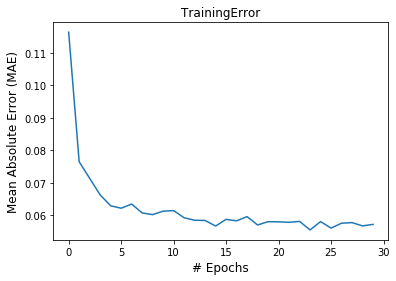

In [15]:
fig, ax1 = plt.subplots(1,1)
 
ax1.plot(eth_history.epoch, eth_history.history['loss'])
ax1.set_title('TrainingError')
 
if eth_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

Text(0.75, 0.9, 'MAE: 0.0491')

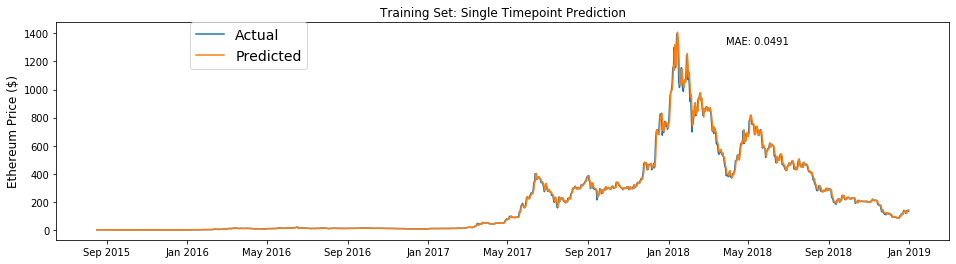

In [16]:
 fig, ax1 = plt.subplots(1,1,figsize=(16,4))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2020) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2020) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         training_set['eth_Close**'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
         ((np.transpose(eth_model.predict(LSTM_training_inputs))+1) * training_set['eth_Close**'].values[:-window_len])[0], 
         label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.15, 1), loc=2, borderaxespad=0., prop={'size': 14})
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_training_inputs))+1)-\
            (training_set['eth_Close**'].values[window_len:])/(training_set['eth_Close**'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')

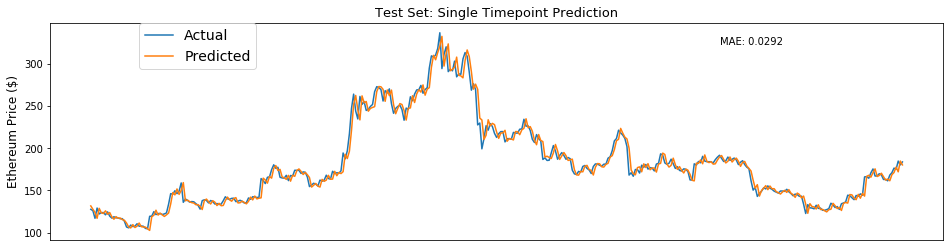

In [17]:
fig, ax1 = plt.subplots(1,1,figsize=(16,4))
ax1.set_xticks([datetime.date(2017,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2017,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:],
test_set['eth_Close**'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:],
((np.transpose(eth_model.predict(LSTM_test_inputs))+1) * test_set['eth_Close**'].values[:-window_len])[0], 
label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(eth_model.predict(LSTM_test_inputs))+1)-\
(test_set['eth_Close**'].values[window_len:])/(test_set['eth_Close**'].values[:-window_len]))), 
xy=(0.75, 0.9),  xycoords='axes fraction',
xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Ethereum Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

前日の価格を後追いする傾向が強い。それでもただ単に後追いするよりはマシになっている。

## ここからビットコイン価格学習

In [18]:
np.random.seed(202)
 
# モデル構成
bt_model = build_model(LSTM_training_inputs, output_size=1, neurons = 20)
 
# トレーニングデータでモデルの訓練（ビットコイン版）
bt_history = bt_model.fit(LSTM_training_inputs, 
                            (training_set['bt_Close**'][window_len:].values/training_set['bt_Close**'][:-window_len].values)-1, 
                            epochs=30, batch_size=1, verbose=2, shuffle=True)

Epoch 1/30
 - 8s - loss: 0.0656
Epoch 2/30
 - 8s - loss: 0.0462
Epoch 3/30
 - 8s - loss: 0.0412
Epoch 4/30
 - 8s - loss: 0.0379
Epoch 5/30
 - 8s - loss: 0.0363
Epoch 6/30
 - 7s - loss: 0.0351
Epoch 7/30
 - 8s - loss: 0.0339
Epoch 8/30
 - 8s - loss: 0.0337
Epoch 9/30
 - 8s - loss: 0.0336
Epoch 10/30
 - 8s - loss: 0.0329
Epoch 11/30
 - 8s - loss: 0.0331
Epoch 12/30
 - 8s - loss: 0.0335
Epoch 13/30
 - 8s - loss: 0.0324
Epoch 14/30
 - 8s - loss: 0.0320
Epoch 15/30
 - 9s - loss: 0.0319
Epoch 16/30
 - 9s - loss: 0.0315
Epoch 17/30
 - 9s - loss: 0.0313
Epoch 18/30
 - 8s - loss: 0.0320
Epoch 19/30
 - 9s - loss: 0.0321
Epoch 20/30
 - 8s - loss: 0.0313
Epoch 21/30
 - 8s - loss: 0.0317
Epoch 22/30
 - 8s - loss: 0.0319
Epoch 23/30
 - 8s - loss: 0.0318
Epoch 24/30
 - 8s - loss: 0.0314
Epoch 25/30
 - 8s - loss: 0.0314
Epoch 26/30
 - 7s - loss: 0.0308
Epoch 27/30
 - 7s - loss: 0.0313
Epoch 28/30
 - 7s - loss: 0.0312
Epoch 29/30
 - 7s - loss: 0.0312
Epoch 30/30
 - 7s - loss: 0.0312


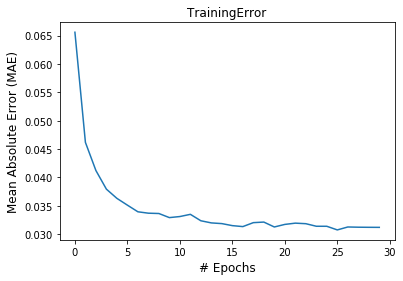

In [26]:
fig, ax1 = plt.subplots(1,1)
 
ax1.plot(bt_history.epoch, bt_history.history['loss'])
ax1.set_title('TrainingError')
 
if bt_model.loss == 'mae':
    ax1.set_ylabel('Mean Absolute Error (MAE)',fontsize=12)
else:
    ax1.set_ylabel('Model Loss',fontsize=12)
ax1.set_xlabel('# Epochs',fontsize=12)
plt.show()

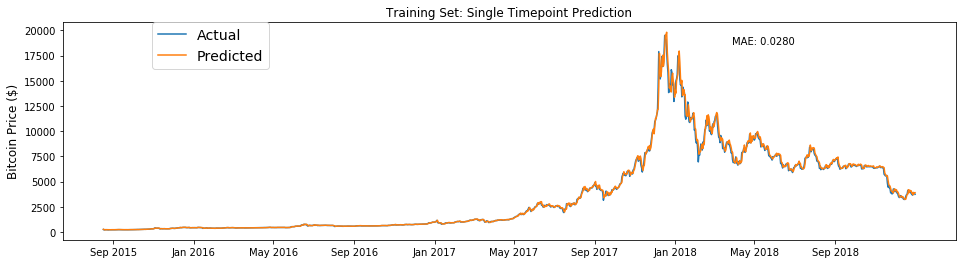

In [19]:
fig, ax1 = plt.subplots(1,1,figsize=(16,4))
ax1.set_xticks([datetime.date(i,j,1) for i in range(2013,2019) for j in [1,5,9]])
ax1.set_xticklabels([datetime.date(i,j,1).strftime('%b %Y')  for i in range(2013,2019) for j in [1,5,9]])
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
training_set['bt_Close**'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']< split_date]['Date'][window_len:],
((np.transpose(bt_model.predict(LSTM_training_inputs))+1) * training_set['bt_Close**'].values[:-window_len])[0], 
label='Predicted')
ax1.set_title('Training Set: Single Timepoint Prediction')
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_training_inputs))+1)-\
(training_set['bt_Close**'].values[window_len:])/(training_set['bt_Close**'].values[:-window_len]))), 
xy=(0.75, 0.9),  xycoords='axes fraction',
xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})

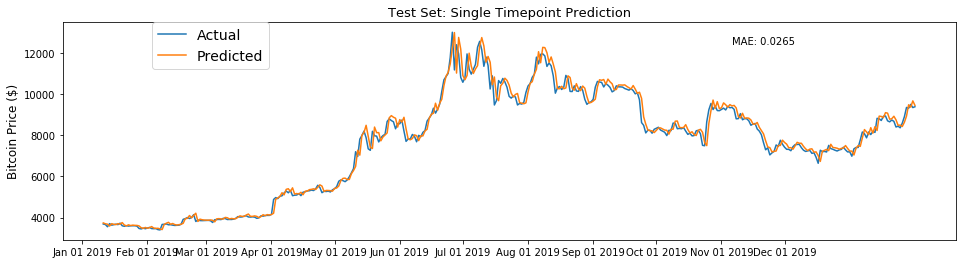

In [20]:
fig, ax1 = plt.subplots(1,1,figsize=(16,4))
ax1.set_xticks([datetime.date(2019,i+1,1) for i in range(12)])
ax1.set_xticklabels([datetime.date(2019,i+1,1).strftime('%b %d %Y')  for i in range(12)])
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:],
         test_set['bt_Close**'][window_len:], label='Actual')
ax1.plot(model_data[model_data['Date']>= split_date]['Date'][window_len:],
         ((np.transpose(bt_model.predict(LSTM_test_inputs))+1) * test_set['bt_Close**'].values[:-window_len])[0], 
         label='Predicted')
ax1.annotate('MAE: %.4f'%np.mean(np.abs((np.transpose(bt_model.predict(LSTM_test_inputs))+1)-\
            (test_set['bt_Close**'].values[window_len:])/(test_set['bt_Close**'].values[:-window_len]))), 
             xy=(0.75, 0.9),  xycoords='axes fraction',
            xytext=(0.75, 0.9), textcoords='axes fraction')
ax1.set_title('Test Set: Single Timepoint Prediction',fontsize=13)
ax1.set_ylabel('Bitcoin Price ($)',fontsize=12)
ax1.legend(bbox_to_anchor=(0.1, 1), loc=2, borderaxespad=0., prop={'size': 14})
plt.show()

## 資産運用してみよう
2019年から今日(2020年2月6日)まで運用するシミュレーションをしてみる。
翌日BTCが上がると予想するなら全資産をBTCに、下がると予想するなら全資産を円に換金する。

In [29]:
yen=0.0
bt=1.0
capitals=[]

In [30]:
pred=np.transpose(bt_model.predict(LSTM_test_inputs))[0]
for i in range(len(model_data[model_data['Date']>= split_date]['Date'][window_len:])-1):
    if(pred[i]>0):
        bt=bt+yen
        yen=0
    elif(pred[i]<=0):
        yen=yen+bt
        bt=0
        
    bt=bt*test_set["bt_Close**"][i+1]/test_set["bt_Close**"][i]
    capital=yen+bt
    capitals.append(capital)

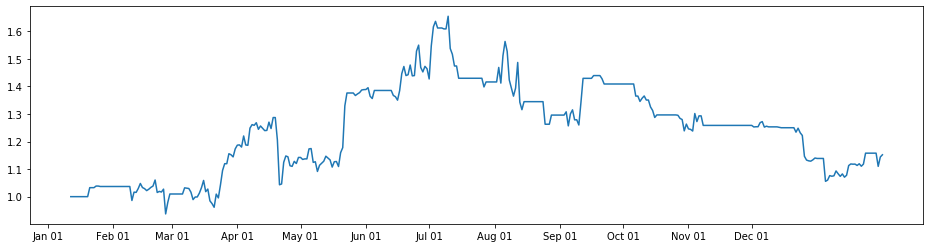

In [31]:
fig,ax2=plt.subplots(1,1,figsize=(16,4))
ax2.set_xticks([datetime.date(2019,i+1,1) for i in range(12)])
ax2.set_xticklabels([datetime.date(2019,i+1,1).strftime('%b %d')  for i in range(12)])
ax2.plot(model_data[model_data['Date']>= split_date]['Date'][window_len+1:],capitals)
plt.show()

## 1年間で1.1倍になった!!!!!!!!!!!
が......本当にいいモデルと言っていいのか......
ビットコインは2019年1月1日から2020年2月6日現在までで2.26倍になっているので、平均的に半分の期間で資産をビットコインとして保有していたとするとせめて1.5倍くらい行って欲しい感じがする。

特に、急な暴落、高騰が予測できていない感じがする。噂によると、金融商品の価格予想アルゴリズムはまだまだと聞いていたがやっぱりなという感じ。